<a href="https://colab.research.google.com/github/pasosa-s/crow_vs_raven/blob/master/crow_vs_raven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!ls

sample_data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from fastai.vision import *

In [8]:
path = Path('/content/drive/My Drive/Colab Notebooks/crow_vs_raven')

In [9]:
folder = 'crow'
file = 'urls_crow.csv'

In [12]:
folder = 'raven'
file = 'urls_raven.csv'

In [13]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
classes = ['crow', 'raven']

In [14]:
download_images(path/file, dest)

In [57]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes, data.c

(['crow', 'raven'], 2)

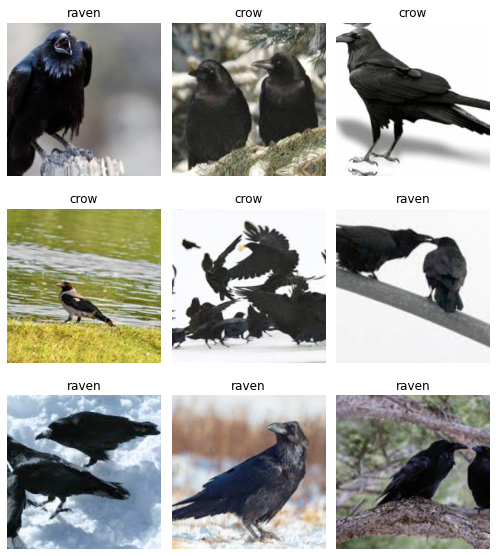

In [11]:
data.show_batch(3, figsize=(7, 8))

In [61]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [62]:
learn.save('stage-0')

In [63]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.516682,1.037682,0.291667,00:04


In [64]:
learn.save('stage-1')

In [65]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.762078,1.143649,0.270833,00:03
1,0.672969,1.237040,0.229167,00:04


In [66]:
learn.save('stage-2')

In [67]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


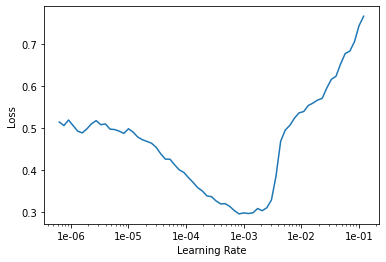

In [68]:
learn.lr_find()
learn.recorder.plot()

In [96]:
learn.load('stage-2');

In [97]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.292667,0.832676,0.166667,00:04


In [98]:
learn.save('stage-3')